# Outils informatiques/méthodes numériques avancées  pour la mécanique
# cours MGC2367M
# Dpt de mécanique UCB Lyon 1

A la fin de votre session, pensez bien à vous déconnecter (bouton en haut à gauche **se déconnecter**)

**Ecrire votre nom , prénom et numéro d'étudiant (nombre entier) ci-dessous**

In [80]:
NOM = "MOUHALHAL"
PRENOM="Moussaab"
NUMERO_ETUDIANT = 12408113

# TP Manipulation de triangles en 2D

nécessite la validation du notebook ClassPoint (classe Point)

**vous devez écrire les fonctions dont le nom est fixé, mais dont vous devez
spécifier les arguments en fonction de la question posée.**

**Attention:** exécuter toutes les cellules depuis le début en utilisant le bouton **run**

In [81]:
%matplotlib inline
import os,sys
import numpy as np
import matplotlib.pyplot as plt
from validation.validation import check_function,liste_functions, info_function, info_etudiant
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
# test si numero étudiant spécifier
# test si numero étudiant spécifier
try: NUMERO_ETUDIANT
except NameError: NUMERO_ETUDIANT = None 
if type(NUMERO_ETUDIANT) is not int :
    printmd("**ERREUR:** numéro d'étudiant non spécifié!!!")
    NOM,PRENOM,NUMERO_ETUDIANT = info_etudiant()
    #raise AssertionError("NUMERO_ETUDIANT non défini")
# parametres spécifiques
_uid_    = NUMERO_ETUDIANT 
_precis_ = 1.0e-5
printmd("**Login étudiant {} {} uid={}**".format(NOM,PRENOM,_uid_))
# recharge les modules
%load_ext autoreload
%autoreload 2

**Login étudiant MOUHALHAL Moussaab uid=12408113**

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Objectif

On se propose d’écrire une classe Python pour manipuler des triangles en 2D, en utilisant la classe Point précédente.

Nous allons utiliser l'éditeur de texte et l'interpréteur IPython de JupyterLab

  -  [documentation JupyterLab](https://jupyterlab.readthedocs.io/en/stable/getting_started/overview.html)

 

## Classe Triangle en  2D

### Canvas de la classe Triangle

Compléter la classe  **Triangle** qui dans l'espace cartésien en 2D permet de définir un triangle à partir de 3 points.  

Vous devez implémenter les méthodes définies dans cette classe et les valider soit dans le notebook
soit en utilisant la commande test_exo pour valider la fonction func (correspondant au text exok)

         test_exo Triangle.py exok func 


In [82]:
S=['exo510', 'exo511', 'exo512', 'exo513', 'exo514','exo515','exo516', 'exo517', 'exo518','exo519']
Func=['']
Exos=liste_functions(S,_uid_)
Meth=['_eq_','barycentre','perimetre','coordbary','inside','translation','rotation','rayon','intersection','surface']
printmd("**Fonctions à valider**")
print("nbre de fonctions= ",len(Exos))
print(Exos)
print("fonctions/methodes à écrire")
print(Meth)

**Fonctions à valider**

nbre de fonctions=  10
['exo510', 'exo511', 'exo512', 'exo513', 'exo514', 'exo515', 'exo516', 'exo517', 'exo518', 'exo519']
fonctions/methodes à écrire
['_eq_', 'barycentre', 'perimetre', 'coordbary', 'inside', 'translation', 'rotation', 'rayon', 'intersection', 'surface']


In [83]:
printmd("**Fonctions à valider**")
# definition des fonctions
for k in range(len(Exos)):
    print("Exercise {} fonction à écrire: {}".format(Exos[k],Meth[k]))
    info_function(Exos[k])

**Fonctions à valider**

Exercise exo510 fonction à écrire: _eq_

Ecrire une classe pour manipuler des triangles en 2D, à qui on fournit 3 points pour créer un triangle et qui surcharge l'operateur égalité ==  (methode __eq__) pour tester si deux triangles sont confondus (à 1.e-05 près).
On passe le nom de la classe ainsi que le nom de la classe Point (comme définie dans la serie 500) pour la validation
    
Exercise exo511 fonction à écrire: barycentre

Ecrire une classe pour manipuler des triangles en 2D, à qui on fournit 3 points pour créer un triangle avec une methode barycentre qui renvoie le point barycentre du traingle.
On passe le nom de la classe ainsi que le nom de la classe Point (comme définie dans la serie 500) pour la validation
    
Exercise exo512 fonction à écrire: perimetre

Ecrire une classe pour manipuler des triangles en 2D, à qui on fournit 3 points pour créer un triangle avec une methode perimetre qui renvoie le perimetre du triangle.
On passe le nom de la classe ainsi que le nom de la c

## classe Triangle 

In [84]:
%%bash
cat Triangle.py

#pour tester : test_exo Triangle.py exo510 Triangle Point
import numpy as np
from Point import *
# classe Triangle
class Triangle(object):
    """creation d'un triangle dans l'espace cartesien"""
    def __init__(self,P1,P2,P3):
        ''' initialisation '''
        # attention on fait une copie des points !!!
        self.Pts = [P1.copy(),P2.copy(),P3.copy()]
        return
    def __str__(self):
        '''conversion chaine pour affichage'''
        return "Triangle:(%s,%s,%s)"%(self.Pts[0],self.Pts[1],self.Pts[2]) 
    def __eq__(self,T):
        '''test si le triangle est confondu avec T'''
        check=0
        for i in range(3) :
            for j in range(3) :
                if self.Pts[i]==T.Pts[j] :
                    check+=1
        if check==3 :
            return True
        return False
    def barycentre(self):
        '''calcul le point barycentre du triangle'''
        p1=self.Pts[0]
        p2=self.Pts[1]
        p3=self.Pts[2]
        x=(p1.x+p2.x+p3.x)/3
     

In [85]:
%autoreload 2
# test classe
from Point import Point
from Triangle import *
P1=Point(0,0)
P2=Point(1,0)
P3=Point(0,1)
P4=Point(1,1)
T1=Triangle(P1,P2,P3)
print(T1)

Triangle:(Point:(0,0),Point:(1,0),Point:(0,1))


## test égalité de 2 triangles (méthode eq )
### vérification

In [86]:
%autoreload 2
from Triangle import *
T2=Triangle(P2,P1,P3)
print(T1==T2)

True


### test de validation

In [87]:
# ne pas modifier

## calcul du barycentre (methode barycentre)
### vérification

In [88]:
%autoreload 2
from Triangle import *
print(T1.barycentre())

Point:(0.3333333333333333,0.3333333333333333)


### test de validation

In [89]:
# ne pas modifier

## calcul du perimetre (methode perimetre)
### vérification

In [90]:
%autoreload 2
from Triangle import *
print(T1.perimetre())

3.414213562373095


### Test de validation

In [91]:
# ne pas modifier

## calcul de la surface  (methode surface)
### vérification

In [92]:
%autoreload 2
from Triangle import *
print(T1.surface())

0.5


### test de validation

In [93]:
# ne pas modifier

## calcul des coordonnees barycentre d'un point P (methode coordbary)
### vérification

In [94]:
%autoreload 2
from Triangle import *
print(T1.coordbary(Point(0,0)))

(1.0, 0.0, 0.0)


### test de validation

In [95]:
# ne pas modifier

## test si un point est dans le triangle (inside)
### vérification

In [96]:
%autoreload 2
from Triangle import *
print(T1.inside(Point(0.5,0.5)))

True


### test de validation

In [97]:
# ne pas modifier

## translation d'un triangle (translation)
### vérification

In [98]:
%autoreload 2
from Triangle import *
T2.translation(1,1)
print(T2)
T2.translation(-1,-1)

Triangle:(Point:(2,1),Point:(1,1),Point:(1,2))


### test de validation

In [99]:
# ne pas modifier

## rotation d'un triangle (rotation)
### vérification

In [100]:
%autoreload 2
from Triangle import *
T2.rotation(Point(0,0),90)
print(T2)
T2.rotation(Point(0,0),-90)

Triangle:(Point:(6.123233995736766e-17,1.0),Point:(0.0,0.0),Point:(-1.0,6.123233995736766e-17))


### test de validation

In [101]:
# ne pas modifier

## rayon du triangle  (methode rayon)
calculer le rayon du plus petit cercle contenant le triangle et centré au barycentre de celui-ci. (**attention** ce n'est pas le cercle circonscrit) 
### vérification

In [102]:
%autoreload 2
from Triangle import *
for p in T1.Pts :
    if p.distance(T1.barycentre())==T1.rayon() :
        print("ok")

ok
ok


### test de validation

In [103]:
# ne pas modifier

## test intersection avec un triangle  (methode intersection)
**dificile**: test si le triangle a une intersction non nulle avec un autre triangle.
On utilisera en particulier la méthode rayon (pour éliminer des cas) et la méthode coordbary.
### vérification

In [104]:
%autoreload 2
from Triangle import *
Tr=Triangle(Point(-1,0),Point(-1,1),Point(1,0.5))
print(T1.intersection(Tr))

True


### test de validation

In [105]:
# ne pas modifier

## tracer de triangle
 
 tracer 2 triangles sur une figure

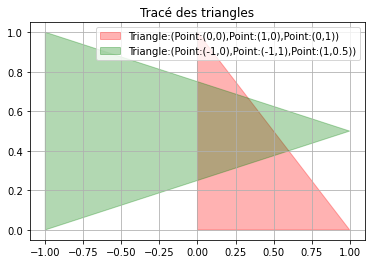

In [107]:
%autoreload 2
from Triangle import *
T1.plot(col='r')
Tr.plot()
plt.savefig("triangle.png")

## FIN